In [2]:
import sys
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates

from mpl_toolkits.axes_grid1 import make_axes_locatable
from datetime import datetime, timedelta

sys.path.append('..')
import config

In [11]:
data_dir = config.RAW_DATA_PATH
print()
print(f'Data dir: {data_dir}')
print()

data_files = glob.glob(data_dir + '/2023-03*.csv')

for data_file in data_files:
    print(data_file)
    
print()


Data dir: /home/siderealyear/arkk/RhT_monitor/data/raw_data

/home/siderealyear/arkk/RhT_monitor/data/raw_data/2023-03-29.csv
/home/siderealyear/arkk/RhT_monitor/data/raw_data/2023-03-30.csv



In [12]:
data_frames = []

for data_file in data_files:
    data = pd.read_csv(data_file)
    data_frames.append(data)
    
data_df = pd.concat(data_frames)
data_df.reset_index(inplace = True, drop = True)
data_df['Datetime'] = pd.to_datetime(data_df['Datetime'])

In [13]:
data_df.head(5)

,Datetime,MCP9808 temperature (°C),MCP9808 temperature (°F),MS8607 temperature (°C),MS8607 temperature (°F),MS8607 pressure (kPa),MS8607 relative humidity (%)
0,2023-03-29 22:42:12.418938,19.1,66.4,19.7,67.5,101.3,30.4
1,2023-03-29 22:43:23.613465,19.1,66.4,19.7,67.5,101.3,30.5
2,2023-03-29 22:44:08.979245,19.2,66.6,19.7,67.5,101.2,30.4
3,2023-03-29 22:45:08.317586,19.1,66.4,19.7,67.5,101.2,30.4
4,2023-03-29 22:46:08.801397,19.2,66.6,19.7,67.5,101.3,30.4


In [14]:
data_df.tail(5)

,Datetime,MCP9808 temperature (°C),MCP9808 temperature (°F),MS8607 temperature (°C),MS8607 temperature (°F),MS8607 pressure (kPa),MS8607 relative humidity (%)
576,2023-03-30 08:18:09.139205,20.0,68.0,20.5,68.9,102.2,23.7
577,2023-03-30 08:19:08.816674,20.1,68.2,20.7,69.3,102.2,23.5
578,2023-03-30 08:20:08.385925,20.2,68.4,20.8,69.4,102.2,23.3
579,2023-03-30 08:21:09.369517,20.2,68.4,21.1,70.0,102.2,22.9
580,2023-03-30 08:22:08.664737,20.2,68.4,21.6,70.9,102.2,22.3


In [15]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Datetime                      581 non-null    datetime64[ns]
 1   MCP9808 temperature (°C)      581 non-null    float64       
 2   MCP9808 temperature (°F)      581 non-null    float64       
 3   MS8607 temperature (°C)       581 non-null    float64       
 4   MS8607 temperature (°F)       581 non-null    float64       
 5   MS8607 pressure (kPa)         581 non-null    float64       
 6   MS8607 relative humidity (%)  581 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 31.9 KB


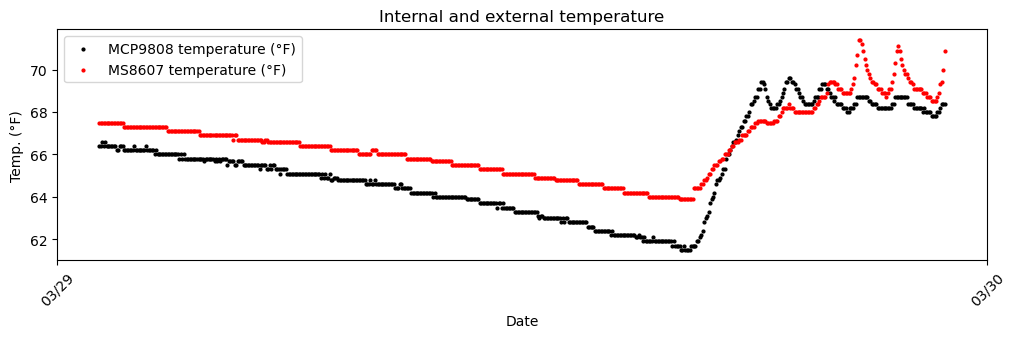

In [26]:
fig = plt.gcf()
fig.set_size_inches(12, 3)

plt.scatter(
    data_df['Datetime'],
    data_df['MCP9808 temperature (°F)'],
    s = 4,
    color = 'black',
    label = 'MCP9808 temperature (°F)'
)

plt.scatter(
    data_df['Datetime'],
    data_df['MS8607 temperature (°F)'],
    s = 4,
    color = 'red',
    label = 'MS8607 temperature (°F)'
)

plt.legend(loc="upper left")

plt.gca().xaxis.set_major_locator(dates.HourLocator(interval = 24))
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%m/%d'))
plt.ticklabel_format(axis = 'y', useOffset = False, style = 'plain')
plt.title('Internal and external temperature')
plt.xlabel('Date')
plt.ylabel('Temp. (°F)')
#plt.xlim(start_date, end_date)

plt.xticks(rotation = 45)

plt.show()

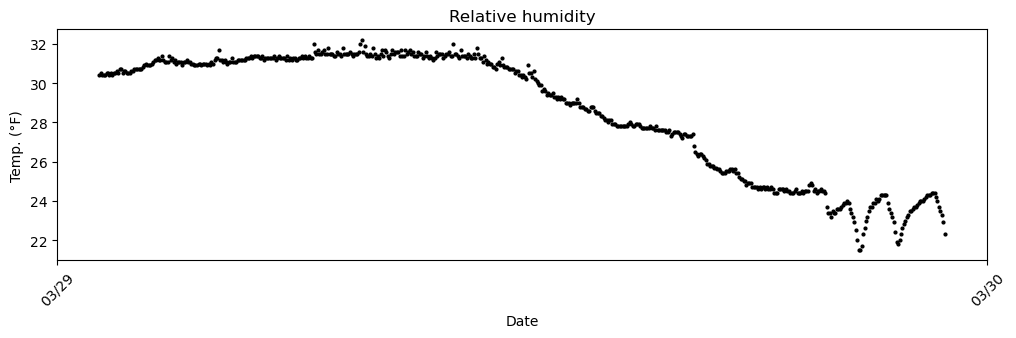

In [27]:
fig = plt.gcf()
fig.set_size_inches(12, 3)

plt.scatter(
    data_df['Datetime'],
    data_df['MS8607 relative humidity (%)'],
    s = 4,
    color = 'black'
)

plt.gca().xaxis.set_major_locator(dates.HourLocator(interval = 24))
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%m/%d'))
plt.ticklabel_format(axis = 'y', useOffset = False, style = 'plain')
plt.title('Relative humidity')
plt.xlabel('Date')
plt.ylabel('Temp. (°F)')
#plt.xlim(start_date, end_date)

plt.xticks(rotation = 45)

plt.show()